## PHOENIX MODEL

In [1]:
import pandas as pd
prev_la_weather = pd.read_csv('Seattle.csv')
prev_la_weather.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2016-01-01,1,5,0.0,1029,7
1,1,2016-01-02,0,4,0.0,1023,6
2,2,2016-01-03,1,7,0.0,1017,5
3,3,2016-01-04,3,12,0.1,1017,6
4,4,2016-01-05,3,5,0.0,1003,5


In [2]:
prev_la_weather.tail()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
1730,1730,2020-09-26,15,18,0.2,1019,17
1731,1731,2020-09-27,18,4,0.0,1029,20
1732,1732,2020-09-28,19,10,0.0,1025,21
1733,1733,2020-09-29,23,7,0.0,1018,26
1734,1734,2020-09-30,26,5,0.0,1022,28


In [9]:
start_dates=['2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01']
end_dates=['2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31']

In [10]:
import requests
def get_weather(city):
    city_dat = []
    dates, temp, wind, precip, pressure, heat = [], [] ,[], [], [], []
    for i in range(len(start_dates)):
        res_str = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=7b7c4ad8a29e48c3a51114119200310&q={city}&format=json&date={start_dates[i]}&enddate={end_dates[i]}'
        city_dat.append(res_str)
#     print(city_dat[0])
        res = requests.get(res_str).json()['data']['weather']
        for j in range(len(res)):
            dates.append(res[j]['date'])
            temp.append(res[j]['avgtempC'])
            wind.append(res[j]['hourly'][4]['windspeedKmph'])
            precip.append(res[j]['hourly'][4]['precipMM'])
            pressure.append(res[j]['hourly'][4]['pressure'])
            heat.append(res[j]['hourly'][4]['HeatIndexC'])
    city_df = pd.DataFrame({
        "Dates":dates,
        "Temperature": temp,
        "Wind Speed": wind,
        "Precipitation": precip,
        "Pressure": pressure,
        "Heat Index": heat
    })
    city_df.to_csv(f'{city}.csv')
    print("OK")

In [12]:
get_weather('Seattle')

OK


In [13]:
new_la_weather = pd.read_csv('Seattle.csv')

In [14]:
new_la_weather.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,6,5,0.0,1020,12
1,1,2015-03-02,5,14,0.0,1018,9
2,2,2015-03-03,3,6,0.0,1023,9
3,3,2015-03-04,4,3,0.0,1024,11
4,4,2015-03-05,5,3,0.0,1027,13


In [15]:
final_la_weather = pd.concat([new_la_weather,prev_la_weather])
final_la_weather

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,6,5,0.0,1020,12
1,1,2015-03-02,5,14,0.0,1018,9
2,2,2015-03-03,3,6,0.0,1023,9
3,3,2015-03-04,4,3,0.0,1024,11
4,4,2015-03-05,5,3,0.0,1027,13
...,...,...,...,...,...,...,...
1730,1730,2020-09-26,15,18,0.2,1019,17
1731,1731,2020-09-27,18,4,0.0,1029,20
1732,1732,2020-09-28,19,10,0.0,1025,21
1733,1733,2020-09-29,23,7,0.0,1018,26


In [16]:
final_la_weather.to_csv('final_la_weather.csv')

---
## WEATHER COMPLETE, LA FIRE TIME

In [33]:
final_la_fire = pd.read_csv('la_fire_data.csv')

In [34]:
final_la_fire

,Unnamed: 0,Unnamed: 0.1,Latitude,Longitude,Date,Fire Intensity,Brightness,dist
0,4261,4261,47.5659,-122.3778,2015-03-16,4.0,300.7,5.671999
1,12469,12469,47.5685,-122.3649,2015-04-01,6.3,303.4,4.928651
2,18317,18317,47.5673,-122.3668,2015-04-19,5.4,310.9,5.112630
3,18374,18374,47.5694,-122.3754,2015-04-19,5.6,310.5,5.249383
4,20402,20402,47.5672,-122.3695,2015-04-26,5.3,306.4,5.219412
...,...,...,...,...,...,...,...,...
1079,723571,42017,47.1520,-121.8400,2020-09-09,19.3,322.0,62.957139
1080,725378,43824,47.1540,-121.8450,2020-09-10,7.5,304.8,62.554660
1081,726623,45069,47.1620,-121.8430,2020-09-10,8.0,306.3,61.926899
1082,729454,47900,47.5740,-122.3680,2020-09-12,5.1,300.1,4.514348


In [35]:
# remove unnamed columns
df = final_la_fire
df = df.loc[:, ~df.columns.str.contains('^Unnamed')].drop(columns=['Latitude', 'Longitude'])
df

,Date,Fire Intensity,Brightness,dist
0,2015-03-16,4.0,300.7,5.671999
1,2015-04-01,6.3,303.4,4.928651
2,2015-04-19,5.4,310.9,5.112630
3,2015-04-19,5.6,310.5,5.249383
4,2015-04-26,5.3,306.4,5.219412
...,...,...,...,...
1079,2020-09-09,19.3,322.0,62.957139
1080,2020-09-10,7.5,304.8,62.554660
1081,2020-09-10,8.0,306.3,61.926899
1082,2020-09-12,5.1,300.1,4.514348


In [36]:
# reassign to good var name
final_la_fire = df
final_la_fire = final_la_fire.rename(columns={'Date':"Dates"})
final_la_fire

,Dates,Fire Intensity,Brightness,dist
0,2015-03-16,4.0,300.7,5.671999
1,2015-04-01,6.3,303.4,4.928651
2,2015-04-19,5.4,310.9,5.112630
3,2015-04-19,5.6,310.5,5.249383
4,2015-04-26,5.3,306.4,5.219412
...,...,...,...,...
1079,2020-09-09,19.3,322.0,62.957139
1080,2020-09-10,7.5,304.8,62.554660
1081,2020-09-10,8.0,306.3,61.926899
1082,2020-09-12,5.1,300.1,4.514348


In [37]:
final_la_weather

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,6,5,0.0,1020,12
1,1,2015-03-02,5,14,0.0,1018,9
2,2,2015-03-03,3,6,0.0,1023,9
3,3,2015-03-04,4,3,0.0,1024,11
4,4,2015-03-05,5,3,0.0,1027,13
...,...,...,...,...,...,...,...
1730,1730,2020-09-26,15,18,0.2,1019,17
1731,1731,2020-09-27,18,4,0.0,1029,20
1732,1732,2020-09-28,19,10,0.0,1025,21
1733,1733,2020-09-29,23,7,0.0,1018,26


In [38]:
final_la_fire

,Dates,Fire Intensity,Brightness,dist
0,2015-03-16,4.0,300.7,5.671999
1,2015-04-01,6.3,303.4,4.928651
2,2015-04-19,5.4,310.9,5.112630
3,2015-04-19,5.6,310.5,5.249383
4,2015-04-26,5.3,306.4,5.219412
...,...,...,...,...
1079,2020-09-09,19.3,322.0,62.957139
1080,2020-09-10,7.5,304.8,62.554660
1081,2020-09-10,8.0,306.3,61.926899
1082,2020-09-12,5.1,300.1,4.514348


In [39]:
# add count of fires as feature
la_fire_cocunt = final_la_fire['Dates'].value_counts()
la_fire_cocunt

2017-09-05    184
2017-09-06     48
2017-08-29     43
2016-08-24     39
2017-09-04     24
             ... 
2019-12-05      1
2015-03-16      1
2019-04-12      1
2015-07-06      1
2017-05-29      1
Name: Dates, Length: 277, dtype: int64

In [40]:
la_fire_count = la_fire_cocunt.to_frame().reset_index().rename(columns={"index":"Dates", "Dates":"Fire Count"}).sort_values(by="Dates", ascending=True)
la_fire_count

,Dates,Fire Count
273,2015-03-16,1
210,2015-04-01,1
121,2015-04-19,2
193,2015-04-26,1
253,2015-05-19,1
...,...,...
10,2020-09-08,15
34,2020-09-09,6
111,2020-09-10,2
169,2020-09-12,1


In [41]:
final_la_fire_merged = pd.merge(final_la_fire, la_fire_count, on='Dates', how='outer')
final_la_fire_merged

,Dates,Fire Intensity,Brightness,dist,Fire Count
0,2015-03-16,4.0,300.7,5.671999,1
1,2015-04-01,6.3,303.4,4.928651,1
2,2015-04-19,5.4,310.9,5.112630,2
3,2015-04-19,5.6,310.5,5.249383,2
4,2015-04-26,5.3,306.4,5.219412,1
...,...,...,...,...,...
1079,2020-09-09,19.3,322.0,62.957139,6
1080,2020-09-10,7.5,304.8,62.554660,2
1081,2020-09-10,8.0,306.3,61.926899,2
1082,2020-09-12,5.1,300.1,4.514348,1


In [42]:
los_angeles_data = pd.merge(final_la_weather, final_la_fire_merged, on='Dates', how='left')

In [43]:
los_angeles_data

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,6,5,0.0,1020,12,NaN,NaN,NaN,NaN
1,1,2015-03-02,5,14,0.0,1018,9,NaN,NaN,NaN,NaN
2,2,2015-03-03,3,6,0.0,1023,9,NaN,NaN,NaN,NaN
3,3,2015-03-04,4,3,0.0,1024,11,NaN,NaN,NaN,NaN
4,4,2015-03-05,5,3,0.0,1027,13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2843,1730,2020-09-26,15,18,0.2,1019,17,NaN,NaN,NaN,NaN
2844,1731,2020-09-27,18,4,0.0,1029,20,NaN,NaN,NaN,NaN
2845,1732,2020-09-28,19,10,0.0,1025,21,NaN,NaN,NaN,NaN
2846,1733,2020-09-29,23,7,0.0,1018,26,NaN,NaN,NaN,NaN


In [44]:
# bhai = los_angeles_data.fillna(los_angeles_data.mean())
bhai = los_angeles_data.fillna(0)
bhai

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,6,5,0.0,1020,12,0.0,0.0,0.0,0.0
1,1,2015-03-02,5,14,0.0,1018,9,0.0,0.0,0.0,0.0
2,2,2015-03-03,3,6,0.0,1023,9,0.0,0.0,0.0,0.0
3,3,2015-03-04,4,3,0.0,1024,11,0.0,0.0,0.0,0.0
4,4,2015-03-05,5,3,0.0,1027,13,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2843,1730,2020-09-26,15,18,0.2,1019,17,0.0,0.0,0.0,0.0
2844,1731,2020-09-27,18,4,0.0,1029,20,0.0,0.0,0.0,0.0
2845,1732,2020-09-28,19,10,0.0,1025,21,0.0,0.0,0.0,0.0
2846,1733,2020-09-29,23,7,0.0,1018,26,0.0,0.0,0.0,0.0


In [45]:
bhai.to_csv('final_la_data.csv')

## ML STARTS NOW
### DATA PREPROCESSING DONE


In [46]:
# IMPORT LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [47]:
src = pd.read_csv('final_la_data.csv', index_col=0)
src

,Unnamed: 0.1,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,6,5,0.0,1020,12,0.0,0.0,0.0,0.0
1,1,2015-03-02,5,14,0.0,1018,9,0.0,0.0,0.0,0.0
2,2,2015-03-03,3,6,0.0,1023,9,0.0,0.0,0.0,0.0
3,3,2015-03-04,4,3,0.0,1024,11,0.0,0.0,0.0,0.0
4,4,2015-03-05,5,3,0.0,1027,13,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2843,1730,2020-09-26,15,18,0.2,1019,17,0.0,0.0,0.0,0.0
2844,1731,2020-09-27,18,4,0.0,1029,20,0.0,0.0,0.0,0.0
2845,1732,2020-09-28,19,10,0.0,1025,21,0.0,0.0,0.0,0.0
2846,1733,2020-09-29,23,7,0.0,1018,26,0.0,0.0,0.0,0.0


In [57]:
df = src.loc[:, ~src.columns.str.contains('^Unnamed')]
df

,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,2015-03-01,6,5,0.0,1020,12,0.0,0.0,0.0,0.0
1,2015-03-02,5,14,0.0,1018,9,0.0,0.0,0.0,0.0
2,2015-03-03,3,6,0.0,1023,9,0.0,0.0,0.0,0.0
3,2015-03-04,4,3,0.0,1024,11,0.0,0.0,0.0,0.0
4,2015-03-05,5,3,0.0,1027,13,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2843,2020-09-26,15,18,0.2,1019,17,0.0,0.0,0.0,0.0
2844,2020-09-27,18,4,0.0,1029,20,0.0,0.0,0.0,0.0
2845,2020-09-28,19,10,0.0,1025,21,0.0,0.0,0.0,0.0
2846,2020-09-29,23,7,0.0,1018,26,0.0,0.0,0.0,0.0


In [58]:
df['Date'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d")
df['month'] = df['Date'].dt.month
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df = df.drop(columns=['Dates', 'Date'])
df

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month
0,6,5,0.0,1020,12,0.0,0.0,0.0,0.0,Mar
1,5,14,0.0,1018,9,0.0,0.0,0.0,0.0,Mar
2,3,6,0.0,1023,9,0.0,0.0,0.0,0.0,Mar
3,4,3,0.0,1024,11,0.0,0.0,0.0,0.0,Mar
4,5,3,0.0,1027,13,0.0,0.0,0.0,0.0,Mar
...,...,...,...,...,...,...,...,...,...,...
2843,15,18,0.2,1019,17,0.0,0.0,0.0,0.0,Sep
2844,18,4,0.0,1029,20,0.0,0.0,0.0,0.0,Sep
2845,19,10,0.0,1025,21,0.0,0.0,0.0,0.0,Sep
2846,23,7,0.0,1018,26,0.0,0.0,0.0,0.0,Sep


# PLEASE SKIP AMBITOIUS PLAN AHEAD (TIME ERIES STUFF)

In [50]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install seaborn
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [73]:
bhai

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,Fire Count
0,0,2015-03-01,11,10,0.0,1014,17,0.000000,0.000000,0.0
1,1,2015-03-02,11,8,0.0,1010,14,10.600000,302.000000,1.0
2,2,2015-03-03,11,6,0.0,1016,17,17.700000,309.285714,1.0
3,3,2015-03-04,11,2,0.0,1020,20,4.975000,305.925000,1.0
4,4,2015-03-05,13,8,0.0,1026,21,12.175000,316.300000,1.0
...,...,...,...,...,...,...,...,...,...,...
2036,1730,2020-09-26,22,10,0.0,1016,25,0.000000,0.000000,0.0
2037,1731,2020-09-27,26,8,0.0,1012,27,157.545455,351.018182,1.0
2038,1732,2020-09-28,27,5,0.0,1013,28,172.746769,358.553538,1.0
2039,1733,2020-09-29,25,6,0.0,1016,27,73.657143,324.331429,1.0


In [75]:
bhai.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2041.0,759.877511,528.784728,0.0,255.0,714.0,1224.000000,1734.000
Temperature,2041.0,13.507594,5.751391,0.0,12.0,14.0,17.000000,28.000
Wind Speed,2041.0,12.896129,6.479378,0.0,9.0,12.0,16.000000,49.000
Precipitation,2041.0,0.072268,0.560230,0.0,0.0,0.0,0.000000,20.400
Pressure,2041.0,1016.376286,4.658379,988.0,1013.0,1016.0,1019.000000,1035.000
Heat Index,2041.0,19.258697,5.233724,8.0,15.0,19.0,25.000000,40.000
Fire Intensity,2041.0,12.954302,33.036800,0.0,0.0,0.0,15.066667,703.675
Brightness,2041.0,150.087421,159.650565,0.0,0.0,0.0,317.880000,367.242
Fire Count,2041.0,0.469868,0.499214,0.0,0.0,0.0,1.000000,1.000


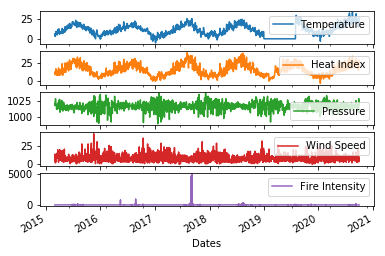

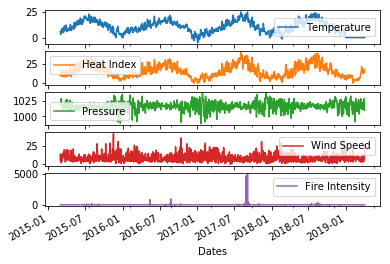

In [52]:
df = bhai
date_time = pd.to_datetime(df.pop('Dates'), format="%Y-%m-%d")
plot_cols = ['Temperature', 'Heat Index', 'Pressure', 'Wind Speed', 'Fire Intensity']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:-600]
plot_features.index = date_time[:-600]
_ = plot_features.plot(subplots=True)

In [53]:
# 70 10 20 split
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [54]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

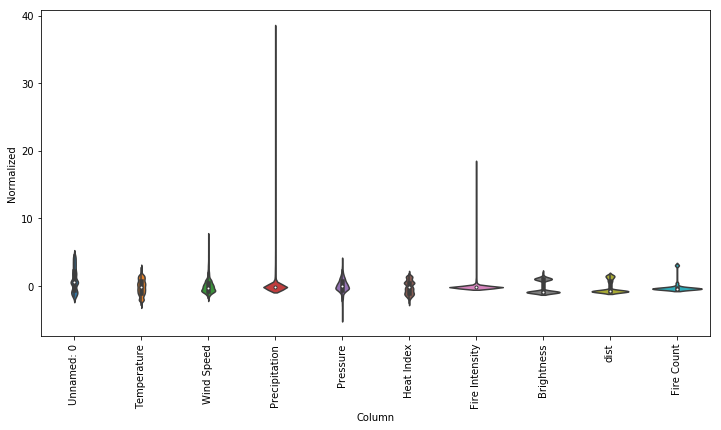

In [55]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [89]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

---

In [59]:
src = pd.get_dummies(df, prefix=['month'])
src

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Apr,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,6,5,0.0,1020,12,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1,5,14,0.0,1018,9,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,6,0.0,1023,9,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,3,0.0,1024,11,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,3,0.0,1027,13,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,15,18,0.2,1019,17,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2844,18,4,0.0,1029,20,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2845,19,10,0.0,1025,21,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2846,23,7,0.0,1018,26,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


## Regression Take 1

In [60]:
X=src.drop("Fire Intensity", axis=1)
y=src["Fire Intensity"].values.reshape(-1,1)
print(X.shape,y.shape)

(2848, 20) (2848, 1)


In [61]:
# ok data setup epic
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
a = [X_train, X_test, y_train, y_test]
for m in a:
    print(len(m))

2136
712
2136
712


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.19928334860961106
Testing Data Score: 0.12805156665338158


---
## Regression Take 2

In [65]:
X_c = src.drop("Fire Count", axis=1)
y_c = src["Fire Count"].values.reshape(-1,1)
print(X_c.shape, y_c.shape)

(2848, 20) (2848, 1)


In [66]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, random_state=1)

In [67]:
a = [X_c_train, X_c_test, y_c_train, y_c_test]
for m in a:
    print(len(m))

2136
712
2136
712


In [68]:
model_2 = LinearRegression()
model_2.fit(X_c_train, y_c_train)
print(f"Training Data Score: {model_2.score(X_c_train, y_c_train)}")
print(f"Testing Data Score: {model_2.score(X_c_test, y_c_test)}")

Training Data Score: 0.5764102524669752
Testing Data Score: 0.5378244481166912


---

In [69]:
df = pd.merge(final_la_weather, final_la_fire_merged)
# df['Dates'] = pd.to_datetime(df['Dates'])
# mask = (df['Dates'] > '2020-07-01') & (df['Dates'] <= '2000-09-30')
# print(df.loc[mask])
df['date'] = pd.to_datetime(df['Dates'])
mask = (df['date'] > '2020-7-1') & (df['date'] <= '2020-9-30')
hol_out_df = df.loc[mask]

In [70]:
df = hol_out_df
df['Date'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d")
df['month'] = df['Date'].dt.month
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')].drop(columns=['Dates', 'Date', 'date'])
df

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month
1031,18,9,0.0,1019,19,7.4,317.3,5.185154,1,Jul
1032,25,9,0.0,1017,27,4.9,302.1,4.722216,1,Jul
1033,28,9,0.0,1016,29,34.6,316.5,64.563902,2,Jul
1034,28,9,0.0,1016,29,57.2,313.8,69.323622,2,Jul
1035,26,10,0.0,1012,28,7.4,304.5,5.010344,2,Jul
1036,26,10,0.0,1012,28,8.2,320.8,4.759410,2,Jul
1037,26,8,0.0,1013,27,6.8,305.5,5.161086,1,Jul
1038,28,6,0.0,1013,29,53.4,316.6,70.074306,1,Jul
1039,25,10,0.0,1017,26,5.5,300.8,4.650566,1,Aug
1040,26,6,0.0,1013,27,64.7,314.7,69.231404,2,Aug


In [71]:
new_la  = pd.get_dummies(df, prefix=['month'])
new_la

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Aug,month_Jul,month_Sep
1031,18,9,0.0,1019,19,7.4,317.3,5.185154,1,0,1,0
1032,25,9,0.0,1017,27,4.9,302.1,4.722216,1,0,1,0
1033,28,9,0.0,1016,29,34.6,316.5,64.563902,2,0,1,0
1034,28,9,0.0,1016,29,57.2,313.8,69.323622,2,0,1,0
1035,26,10,0.0,1012,28,7.4,304.5,5.010344,2,0,1,0
1036,26,10,0.0,1012,28,8.2,320.8,4.759410,2,0,1,0
1037,26,8,0.0,1013,27,6.8,305.5,5.161086,1,0,1,0
1038,28,6,0.0,1013,29,53.4,316.6,70.074306,1,0,1,0
1039,25,10,0.0,1017,26,5.5,300.8,4.650566,1,1,0,0
1040,26,6,0.0,1013,27,64.7,314.7,69.231404,2,1,0,0


In [72]:
new_la['month_October']=0
new_la['month_November']=0
new_la['month_December']=0
new_la['month_January']=0
new_la['month_February']=0
new_la['month_March']=0
new_la['month_April']=0
new_la['month_May']=0
new_la['month_June']=0
new_la

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Aug,...,month_Sep,month_October,month_November,month_December,month_January,month_February,month_March,month_April,month_May,month_June
1031,18,9,0.0,1019,19,7.4,317.3,5.185154,1,0,...,0,0,0,0,0,0,0,0,0,0
1032,25,9,0.0,1017,27,4.9,302.1,4.722216,1,0,...,0,0,0,0,0,0,0,0,0,0
1033,28,9,0.0,1016,29,34.6,316.5,64.563902,2,0,...,0,0,0,0,0,0,0,0,0,0
1034,28,9,0.0,1016,29,57.2,313.8,69.323622,2,0,...,0,0,0,0,0,0,0,0,0,0
1035,26,10,0.0,1012,28,7.4,304.5,5.010344,2,0,...,0,0,0,0,0,0,0,0,0,0
1036,26,10,0.0,1012,28,8.2,320.8,4.759410,2,0,...,0,0,0,0,0,0,0,0,0,0
1037,26,8,0.0,1013,27,6.8,305.5,5.161086,1,0,...,0,0,0,0,0,0,0,0,0,0
1038,28,6,0.0,1013,29,53.4,316.6,70.074306,1,0,...,0,0,0,0,0,0,0,0,0,0
1039,25,10,0.0,1017,26,5.5,300.8,4.650566,1,1,...,0,0,0,0,0,0,0,0,0,0
1040,26,6,0.0,1013,27,64.7,314.7,69.231404,2,1,...,0,0,0,0,0,0,0,0,0,0


## PREDICTION
(i should really have split the dataset lol)

In [128]:
#predict FRP values
X_new_fire=new_la.drop("Fire Intensity", axis=1)
new_fire=model.predict(X_new_fire)
len(new_fire)

53

In [129]:
new_fire

array([[86.47259943],
       [82.55812183],
       [78.89230807],
       [77.6330261 ],
       [87.31976211],
       [91.14282856],
       [83.49010857],
       [75.30088613],
       [60.38301912],
       [54.6460145 ],
       [54.18228623],
       [64.44319855],
       [62.3025951 ],
       [62.06056147],
       [55.02852734],
       [52.74027513],
       [51.75954931],
       [68.26688731],
       [68.07849469],
       [59.65069195],
       [58.42310707],
       [59.50533491],
       [55.99232566],
       [61.12488362],
       [50.39461212],
       [54.71929099],
       [58.1312835 ],
       [58.29254843],
       [79.36452561],
       [81.94831467],
       [77.84421485],
       [90.24228516],
       [81.46876315],
       [83.78509622],
       [85.54295792],
       [77.7389392 ],
       [80.11487461],
       [80.48829448],
       [72.98536502],
       [72.88456526],
       [80.94613855],
       [78.13035169],
       [81.71719504],
       [61.91761711],
       [68.58677519],
       [67

In [130]:
new_fire_list=[]
for i in range(len(new_fire)):
    new_fire_list.append(new_fire[i][0])
new_fire_list

[86.47259943324514,
 82.55812182817829,
 78.89230807373178,
 77.63302610482691,
 87.3197621090589,
 91.14282856405822,
 83.4901085686451,
 75.30088613300893,
 60.38301912319474,
 54.64601450271624,
 54.182286234359026,
 64.44319855252655,
 62.302595104793,
 62.060561469512265,
 55.02852733837017,
 52.740275127455675,
 51.75954931476531,
 68.26688730899048,
 68.07849468875685,
 59.6506919517509,
 58.42310707175312,
 59.505334909959345,
 55.992325663473935,
 61.12488361546599,
 50.39461211672847,
 54.719290992115134,
 58.13128350104557,
 58.292548431376304,
 79.36452561221995,
 81.9483146678848,
 77.84421484600466,
 90.24228515727708,
 81.46876314637757,
 83.78509621958858,
 85.54295791604011,
 77.73893919899626,
 80.11487460909132,
 80.48829447757765,
 72.9853650186077,
 72.88456526184694,
 80.9461385488558,
 78.13035168615733,
 81.71719504321311,
 61.91761711170659,
 68.58677519080356,
 67.3891771698353,
 64.83594579316787,
 67.0798675356935,
 67.05169905361964,
 51.20618023609876,
 51

In [131]:
# prediciton data farme
predict_df=pd.DataFrame({'Washington Region Fires': new_fire_list})
predict_df

,Washington Region Fires
0,86.472599
1,82.558122
2,78.892308
3,77.633026
4,87.319762
5,91.142829
6,83.490109
7,75.300886
8,60.383019
9,54.646015


In [132]:
new_dates = pd.date_range(start='2020-10-01', end='2020-11-30', freq='D')
print(new_dates)
print(len(new_dates))

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
      

In [133]:
predict_df['Dates']=list(new_dates)[:53]

In [134]:
predict_df

,Washington Region Fires,Dates
0,86.472599,2020-10-01
1,82.558122,2020-10-02
2,78.892308,2020-10-03
3,77.633026,2020-10-04
4,87.319762,2020-10-05
5,91.142829,2020-10-06
6,83.490109,2020-10-07
7,75.300886,2020-10-08
8,60.383019,2020-10-09
9,54.646015,2020-10-10


In [135]:
predict_df.to_csv('WASHINGTON_NOT_GOOD_DATA_51DAYS.csv')

In [49]:
# comined CSV FOR JAISAL

In [84]:
lacsv = pd.read_csv('FINAL_LA_44_DAYS.csv')
sfcsv = pd.read_csv('FINAL_SF_40_DAYS.csv')
phoecsv = pd.read_csv('FINAL_PHOENIX_30_DAYS.csv')




final_merged = pd.merge(merged, phoecsv, on='Dates', how='outer')
df = final_merged
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.fillna(0)
df

,Fire Intensity_x,Dates,Fire Intensity_y,Fire Intensity
0,74.672755,2020-10-01,56.875008,62.170287
1,76.782775,2020-10-02,23.059613,15.453074
2,75.725114,2020-10-03,58.301694,84.317342
3,72.082963,2020-10-04,41.389730,35.599108
4,69.535390,2020-10-05,37.952859,-11.448706
5,79.029996,2020-10-06,53.478314,6.452678
6,80.563014,2020-10-07,18.261467,-14.889214
7,73.666036,2020-10-08,46.624334,54.455350
8,66.687940,2020-10-09,43.255403,-13.095983
9,62.848122,2020-10-10,41.268187,-14.226464


In [85]:
df = df[ ['Dates'] + [ col for col in df.columns if col != 'Dates' ] ]


In [86]:
df

,Dates,Fire Intensity_x,Fire Intensity_y,Fire Intensity
0,2020-10-01,74.672755,56.875008,62.170287
1,2020-10-02,76.782775,23.059613,15.453074
2,2020-10-03,75.725114,58.301694,84.317342
3,2020-10-04,72.082963,41.389730,35.599108
4,2020-10-05,69.535390,37.952859,-11.448706
5,2020-10-06,79.029996,53.478314,6.452678
6,2020-10-07,80.563014,18.261467,-14.889214
7,2020-10-08,73.666036,46.624334,54.455350
8,2020-10-09,66.687940,43.255403,-13.095983
9,2020-10-10,62.848122,41.268187,-14.226464


In [88]:
jaisal = df.rename(columns={'Fire Intensity_x':"Los Angeles, CA", 'Fire Intensity_y': 'San Francisco, CA', "Fire Intensity":"Phoenix, AZ"})
jaisal

,Dates,"Los Angeles, CA","San Francisco, CA","Phoenix, AZ"
0,2020-10-01,74.672755,56.875008,62.170287
1,2020-10-02,76.782775,23.059613,15.453074
2,2020-10-03,75.725114,58.301694,84.317342
3,2020-10-04,72.082963,41.389730,35.599108
4,2020-10-05,69.535390,37.952859,-11.448706
5,2020-10-06,79.029996,53.478314,6.452678
6,2020-10-07,80.563014,18.261467,-14.889214
7,2020-10-08,73.666036,46.624334,54.455350
8,2020-10-09,66.687940,43.255403,-13.095983
9,2020-10-10,62.848122,41.268187,-14.226464


In [67]:
jaisal.to_csv('city_wise(3)-data.csv')

In [112]:
lacsv = pd.read_csv('FINAL_LA_44_DAYS.csv')
sfcsv = pd.read_csv('FINAL_SF_40_DAYS.csv')
phoecsv = pd.read_csv('FINAL_PHOENIX_30_DAYS.csv')
yellowstone = pd.read_csv('yellowstone_ke_around_afaik_61D.csv')
colorado = pd.read_csv('CL_FOREST_61_DAYS_maybe_bugged.csv')
missiiiepei = pd.read_csv('us-east-mississipi-basin61days.csv')
north_cali = pd.read_csv('north_cali_oregon_61_days.csv')
washtington_bekaar_data = pd.read_csv('WASHINGTON_NOT_GOOD_DATA_51DAYS.csv')
t_merge = [yellowstone, colorado, missiiiepei, north_cali]


In [123]:
merged = pd.merge(yellowstone, colorado, on='Dates', how='outer')
merged = merged.rename(columns={'Fire Intensity_x':"Yellostone Park Area", 'Fire Intensity_y': 'Colorado FOrests DATA'})

df = merged
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.fillna(0)
df

,Yellostone Park Area,Dates,Colorado FOrests DATA
0,8.774987,2020-10-01,544.682657
1,47.554406,2020-10-02,-4.040421
2,206.409704,2020-10-03,2.356015
3,17.142862,2020-10-04,-8.119814
4,65.952356,2020-10-05,125.080253
...,...,...,...
56,95.369454,2020-11-26,-31.336559
57,20.164243,2020-11-27,35.755547
58,93.456871,2020-11-28,9.015438
59,103.789289,2020-11-29,31.330980


In [124]:
final_merged = pd.merge(df, missiiiepei, on='Dates', how='outer')
final_merged = final_merged.rename(columns={'Fire Intensity': 'Mississippi Region Fires'})
df1 = final_merged
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1 = df1.fillna(0)
df1
# ekormerge = pd.merge(final_merged, north_cali, on='Dates', how='outer')

,Yellostone Park Area,Dates,Colorado FOrests DATA,Mississippi Region Fires
0,8.774987,2020-10-01,544.682657,27.103788
1,47.554406,2020-10-02,-4.040421,31.663921
2,206.409704,2020-10-03,2.356015,35.978588
3,17.142862,2020-10-04,-8.119814,29.885572
4,65.952356,2020-10-05,125.080253,30.414176
...,...,...,...,...
56,95.369454,2020-11-26,-31.336559,31.368614
57,20.164243,2020-11-27,35.755547,31.072318
58,93.456871,2020-11-28,9.015438,29.902513
59,103.789289,2020-11-29,31.330980,26.419575


In [125]:
pakka_last_merge = pd.merge(df1, north_cali, on='Dates', how='outer')
pakka_last_merge = pakka_last_merge.rename(columns={'Fire Intensity': 'North Cali, Oregon Region'})
df2 = pakka_last_merge
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2 = df2.fillna(0)
df2

,Yellostone Park Area,Dates,Colorado FOrests DATA,Mississippi Region Fires,"North Cali, Oregon Region"
0,8.774987,2020-10-01,544.682657,27.103788,5.498000
1,47.554406,2020-10-02,-4.040421,31.663921,65.814717
2,206.409704,2020-10-03,2.356015,35.978588,25.258619
3,17.142862,2020-10-04,-8.119814,29.885572,35.314930
4,65.952356,2020-10-05,125.080253,30.414176,35.577706
...,...,...,...,...,...
56,95.369454,2020-11-26,-31.336559,31.368614,255.406632
57,20.164243,2020-11-27,35.755547,31.072318,132.520173
58,93.456871,2020-11-28,9.015438,29.902513,139.082276
59,103.789289,2020-11-29,31.330980,26.419575,131.997010


In [136]:
washtington_bekaar_data = pd.read_csv('WASHINGTON_NOT_GOOD_DATA_51DAYS.csv')
bhai_please = pd.merge(df2, washtington_bekaar_data, on='Dates', how='outer')
df3 = bhai_please
df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
df3 = df3.fillna(0)
df3


,Yellostone Park Area,Dates,Colorado FOrests DATA,Mississippi Region Fires,"North Cali, Oregon Region",Washington Region Fires
0,8.774987,2020-10-01,544.682657,27.103788,5.498000,86.472599
1,47.554406,2020-10-02,-4.040421,31.663921,65.814717,82.558122
2,206.409704,2020-10-03,2.356015,35.978588,25.258619,78.892308
3,17.142862,2020-10-04,-8.119814,29.885572,35.314930,77.633026
4,65.952356,2020-10-05,125.080253,30.414176,35.577706,87.319762
...,...,...,...,...,...,...
56,95.369454,2020-11-26,-31.336559,31.368614,255.406632,0.000000
57,20.164243,2020-11-27,35.755547,31.072318,132.520173,0.000000
58,93.456871,2020-11-28,9.015438,29.902513,139.082276,0.000000
59,103.789289,2020-11-29,31.330980,26.419575,131.997010,0.000000


In [138]:
jaisal = pd.read_csv('city_wise(3)-data.csv')
jaisal.head()

,Unnamed: 0,Dates,"Los Angeles, CA","San Francisco, CA","Phoenix, AZ"
0,0,2020-10-01,74.672755,56.875008,62.170287
1,1,2020-10-02,76.782775,23.059613,15.453074
2,2,2020-10-03,75.725114,58.301694,84.317342
3,3,2020-10-04,72.082963,41.389730,35.599108
4,4,2020-10-05,69.535390,37.952859,-11.448706


In [139]:
final_merged = pd.merge(jaisal, df3, on='Dates', how='outer')
df = final_merged
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.fillna(0)
df

,Dates,"Los Angeles, CA","San Francisco, CA","Phoenix, AZ",Yellostone Park Area,Colorado FOrests DATA,Mississippi Region Fires,"North Cali, Oregon Region",Washington Region Fires
0,2020-10-01,74.672755,56.875008,62.170287,8.774987,544.682657,27.103788,5.498000,86.472599
1,2020-10-02,76.782775,23.059613,15.453074,47.554406,-4.040421,31.663921,65.814717,82.558122
2,2020-10-03,75.725114,58.301694,84.317342,206.409704,2.356015,35.978588,25.258619,78.892308
3,2020-10-04,72.082963,41.389730,35.599108,17.142862,-8.119814,29.885572,35.314930,77.633026
4,2020-10-05,69.535390,37.952859,-11.448706,65.952356,125.080253,30.414176,35.577706,87.319762
...,...,...,...,...,...,...,...,...,...
56,2020-11-26,0.000000,0.000000,0.000000,95.369454,-31.336559,31.368614,255.406632,0.000000
57,2020-11-27,0.000000,0.000000,0.000000,20.164243,35.755547,31.072318,132.520173,0.000000
58,2020-11-28,0.000000,0.000000,0.000000,93.456871,9.015438,29.902513,139.082276,0.000000
59,2020-11-29,0.000000,0.000000,0.000000,103.789289,31.330980,26.419575,131.997010,0.000000


In [140]:
df.to_csv('OH_BHAI_PLEASE_WORK.csv')

In [142]:
df['Los Angeles, CA'] = df['Los Angeles, CA'].abs()

In [143]:
df['San Francisco, CA'] = df['San Francisco, CA'].abs()

In [144]:
df['Phoenix, AZ'] = df['Phoenix, AZ'].abs()

In [145]:
df['Yellostone Park Area'] = df['Yellostone Park Area'].abs()

In [146]:
df['Colorado FOrests DATA'] = df['Colorado FOrests DATA'].abs()

In [147]:
df['Mississippi Region Fires'] = df['Mississippi Region Fires'].abs()

In [148]:
df['North Cali, Oregon Region'] = df['North Cali, Oregon Region'].abs()

In [149]:
df['Washington Region Fires'] = df['Washington Region Fires'].abs()

In [150]:
df.to_csv('ABS_VALS_ALL_CSV.csv')

In [151]:
df

,Dates,"Los Angeles, CA","San Francisco, CA","Phoenix, AZ",Yellostone Park Area,Colorado FOrests DATA,Mississippi Region Fires,"North Cali, Oregon Region",Washington Region Fires
0,2020-10-01,74.672755,56.875008,62.170287,8.774987,544.682657,27.103788,5.498000,86.472599
1,2020-10-02,76.782775,23.059613,15.453074,47.554406,4.040421,31.663921,65.814717,82.558122
2,2020-10-03,75.725114,58.301694,84.317342,206.409704,2.356015,35.978588,25.258619,78.892308
3,2020-10-04,72.082963,41.389730,35.599108,17.142862,8.119814,29.885572,35.314930,77.633026
4,2020-10-05,69.535390,37.952859,11.448706,65.952356,125.080253,30.414176,35.577706,87.319762
...,...,...,...,...,...,...,...,...,...
56,2020-11-26,0.000000,0.000000,0.000000,95.369454,31.336559,31.368614,255.406632,0.000000
57,2020-11-27,0.000000,0.000000,0.000000,20.164243,35.755547,31.072318,132.520173,0.000000
58,2020-11-28,0.000000,0.000000,0.000000,93.456871,9.015438,29.902513,139.082276,0.000000
59,2020-11-29,0.000000,0.000000,0.000000,103.789289,31.330980,26.419575,131.997010,0.000000
